In [ ]:
# Kylie Clifton
# December 2
# Scraping Homework Part 1 List of funded projects

In [2]:
# Cell 1: Install Playwright and Firefox
%pip install playwright
%playwright install firefox



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%playwright` not found.


In [3]:
# Cell 1: Imports and test fetch
import requests
from bs4 import BeautifulSoup

# Base URL and number of pages to scrape
base_url = "https://nij.ojp.gov/funding/awards/list"
pages_to_scrape = 10

# Example: fetch the first page
params = {"page": 0}  # page 1 corresponds to page=0
response = requests.get(base_url, params=params)
response.raise_for_status()  # will raise an error if request failed

# Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Print the first 500 characters to verify
print(response.text[:500])


<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="og: https://ogp.me/ns#">
  <head>
    <meta charset="utf-8" />
<link rel="preload" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Regular.woff2" as="font" type="font/woff2" crossorigin="" />
<link rel="preload" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Bold.woff2" as="font" type="font/woff2" crossorigin="" />
<link rel="preload" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Italic.woff2" as="font" type="font/woff2" crossorigi


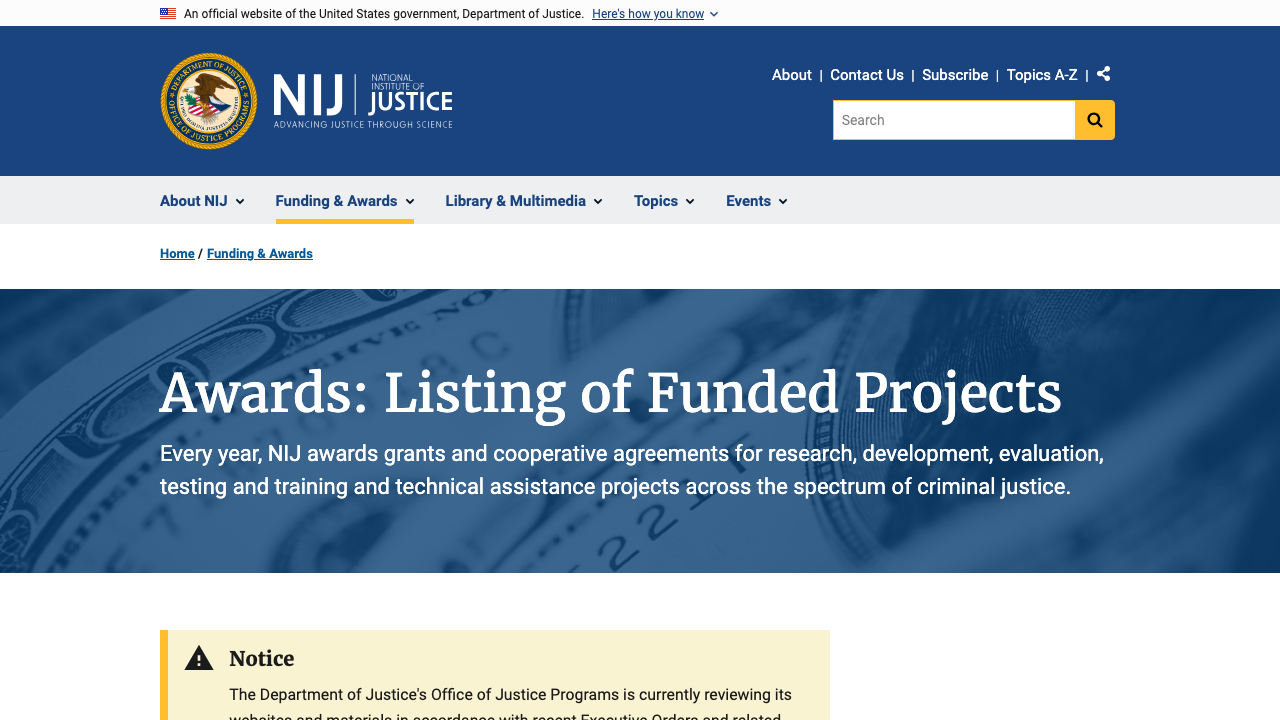

<!DOCTYPE html>
<html class="js" dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-Italic.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/roboto/Roboto-BlackItalic.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/merriweather/Latin-Merriweather-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/themes/custom/ojp/assets/fonts/merriweather/Latin-Merriweather-Bold.woff2" rel="preload" type="font/woff2"/>
  <noscript>
   <style>
    form.antibot * 

In [5]:
# Cell 2a: Fix asyncio for Jupyter
import nest_asyncio
nest_asyncio.apply()

import asyncio
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
from IPython.display import display, Image

async def fetch_page(url, page_number=0):
    async with async_playwright() as p:
        browser = await p.firefox.launch(headless=True)
        page = await browser.new_page()
        
        # Construct the URL with pagination
        full_url = f"{url}?page={page_number}"
        await page.goto(full_url, wait_until="networkidle")
        
        # Take a screenshot and display it (for debugging)
        screenshot_bytes = await page.screenshot()
        display(Image(screenshot_bytes))
        
        # Get page content
        html = await page.content()
        await browser.close()
        return html

# Example usage in Jupyter
url = "https://nij.ojp.gov/funding/awards/list"
html = asyncio.get_event_loop().run_until_complete(fetch_page(url, page_number=0))

# Parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
print(soup.prettify()[:1000])  # Preview first 1000 characters


In [6]:
# Cell 3: Extract award data from the first page
awards = []

# Find all rows in the awards table
rows = soup.find_all("tr")
for row in rows:
    cells = row.find_all("td")
    if len(cells) == 8:  # Only rows with 8 cells (skip headers)
        award = {
            "Fiscal Year": cells[0].get_text(strip=True),
            "Title": cells[1].get_text(strip=True),
            "Funding Opportunity": cells[2].get_text(strip=True),
            "Awardee": cells[3].get_text(strip=True),
            "State": cells[4].get_text(strip=True),
            "Award Number": cells[5].get_text(strip=True),
            "Award Amount": cells[6].get_text(strip=True),
            "Award Status": cells[7].get_text(strip=True),
        }
        awards.append(award)

# Preview the first 5 awards
awards[:5]


[{'Fiscal Year': '2024',
  'Title': 'A Combined Molecular Analysis of Pollen Utilizing Lipid Profiling & DNA Barcoding for Plant Species Identification: A Forensic Application',
  'Funding Opportunity': 'NIJ FY24 Graduate Research Fellowship',
  'Awardee': 'THE UNIVERSITY OF CENTRAL FLORIDA BOARD OF TRUSTEES',
  'State': 'FL',
  'Award Number': '15PNIJ-24-GG-01571-RESS',
  'Award Amount': '$120,000',
  'Award Status': 'Open'},
 {'Fiscal Year': '2024',
  'Title': 'A Comparative Evaluation of the MinION and MiSeq Sequencing Platforms for the Analysis of Human Hand Microbial Profiles for Forensic Investigations.',
  'Funding Opportunity': 'NIJ FY24 Research and Development in Forensic Science for Criminal Justice Purposes',
  'Awardee': 'FLORIDA INTERNATIONAL UNIVERSITY',
  'State': 'FL',
  'Award Number': '15PNIJ-24-GG-03842-SLFO',
  'Award Amount': '$487,790',
  'Award Status': 'Open'},
 {'Fiscal Year': '2024',
  'Title': 'A Comprehensive Evaluation and Error Rate Assessment of Field Co

Scraping page 1...


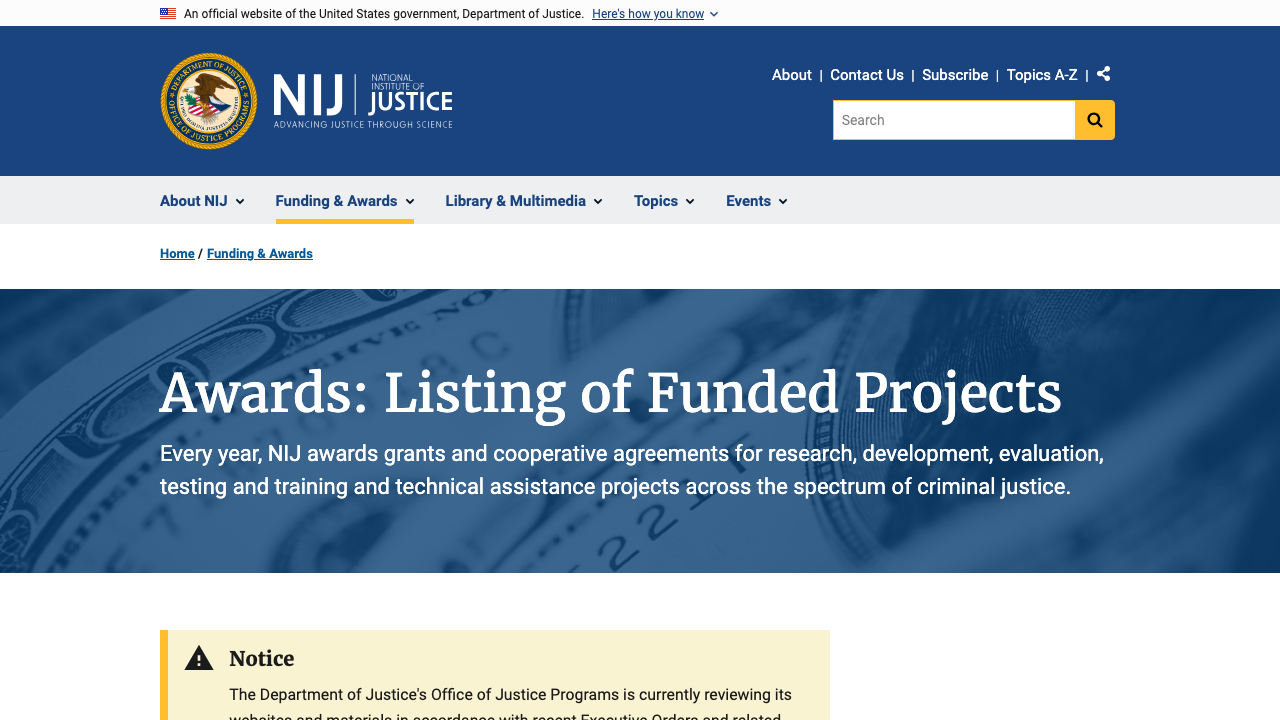

Scraping page 2...


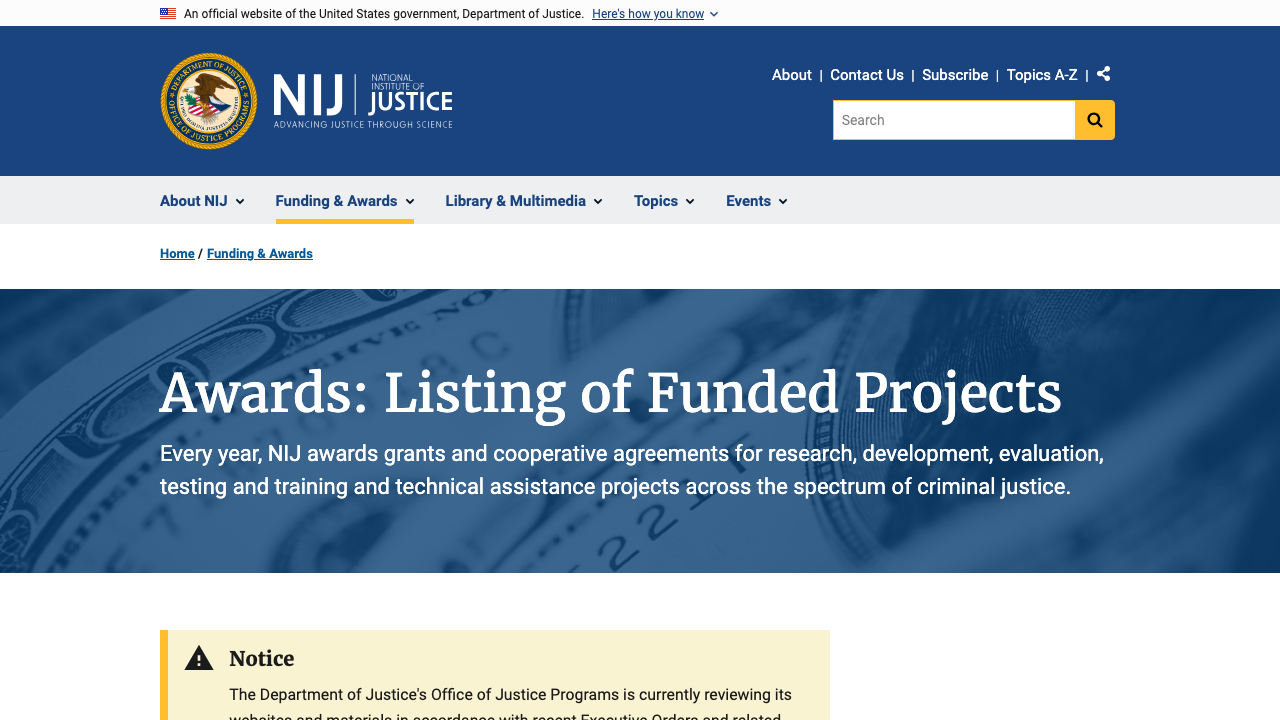

Scraping page 3...


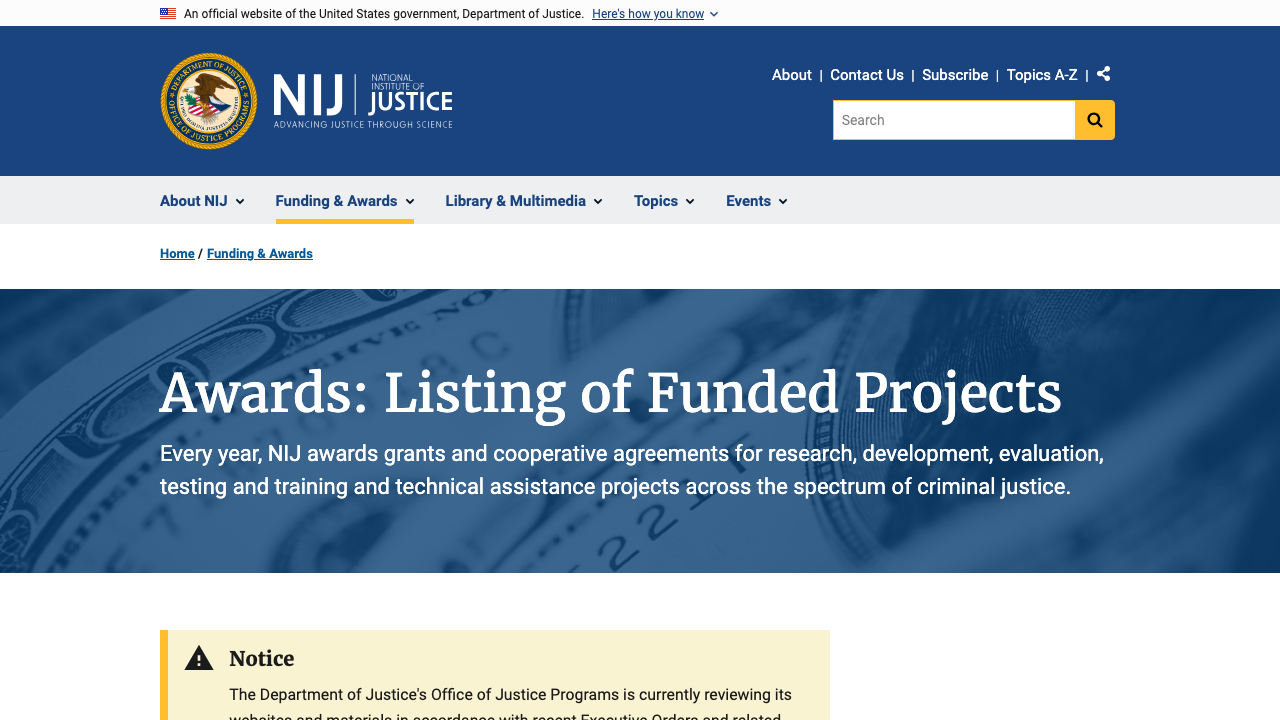

Scraping page 4...


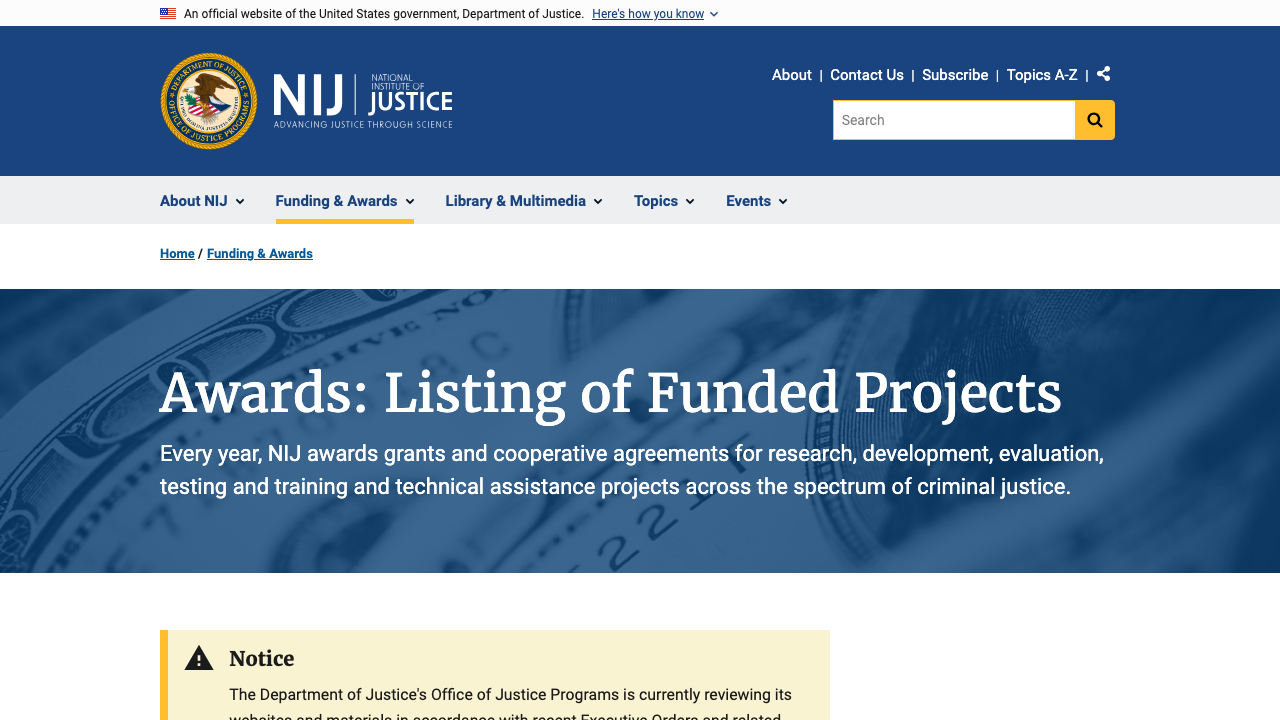

Scraping page 5...


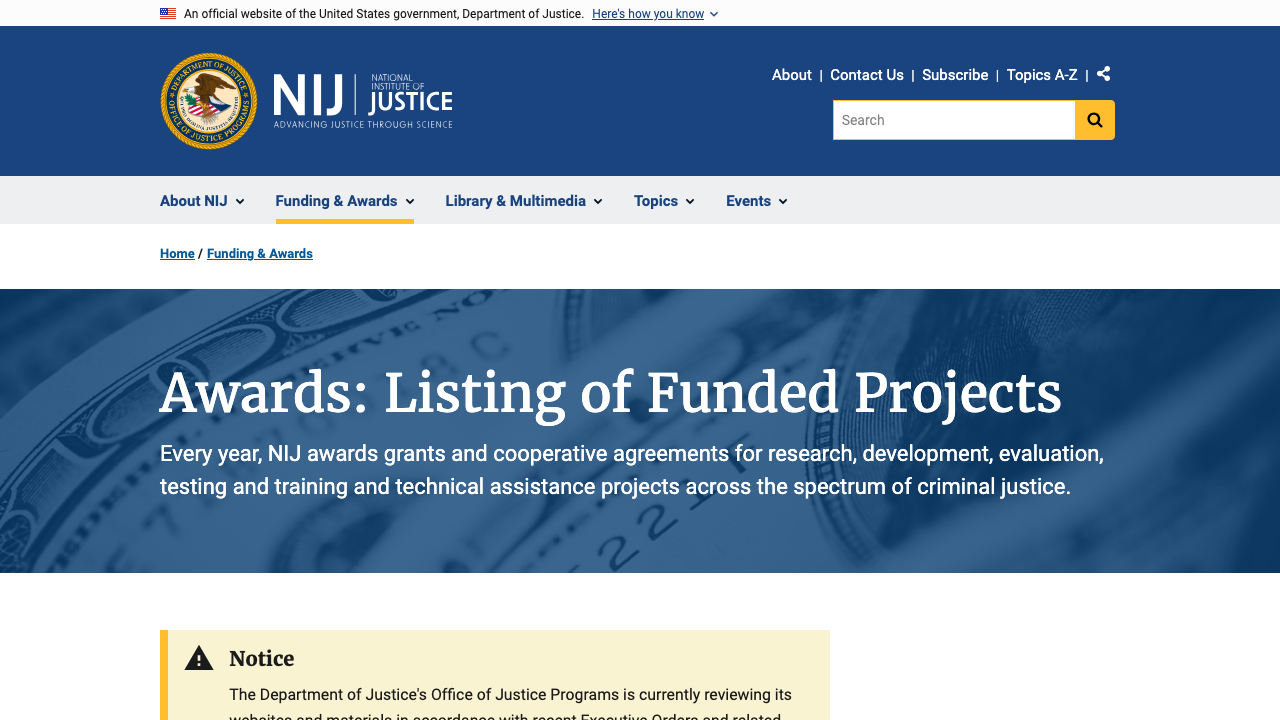

Scraping page 6...


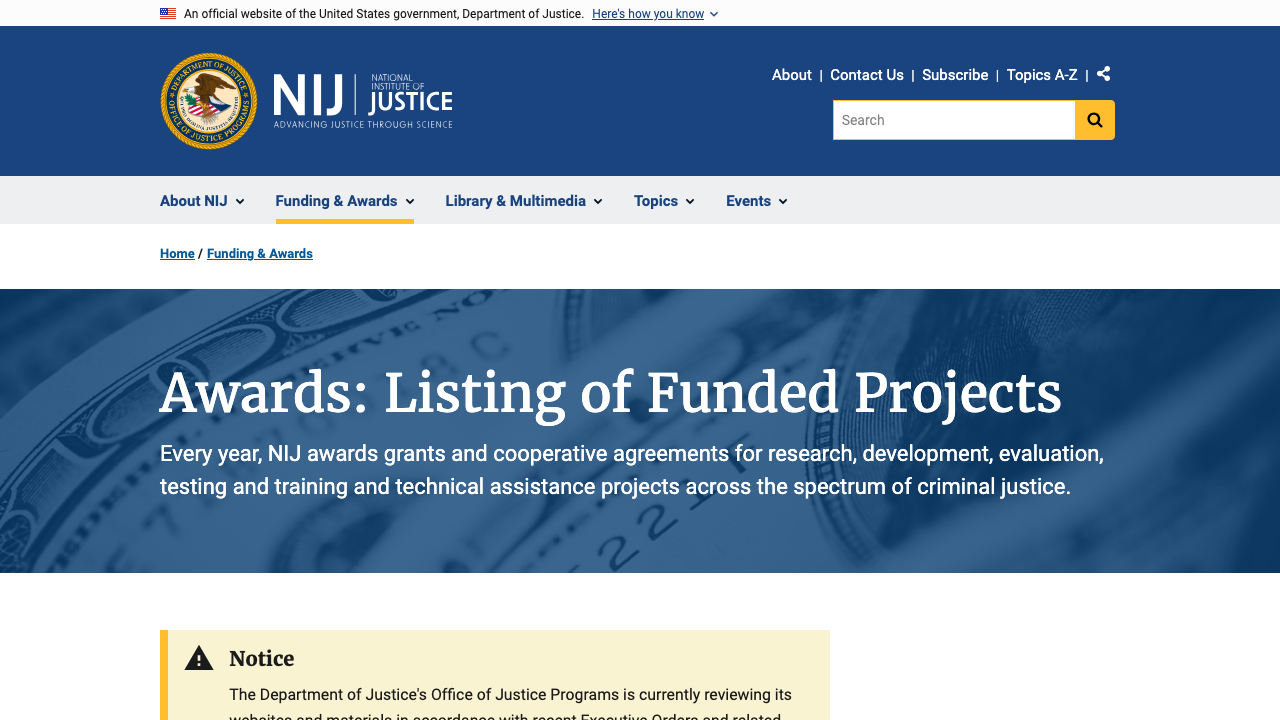

Scraping page 7...


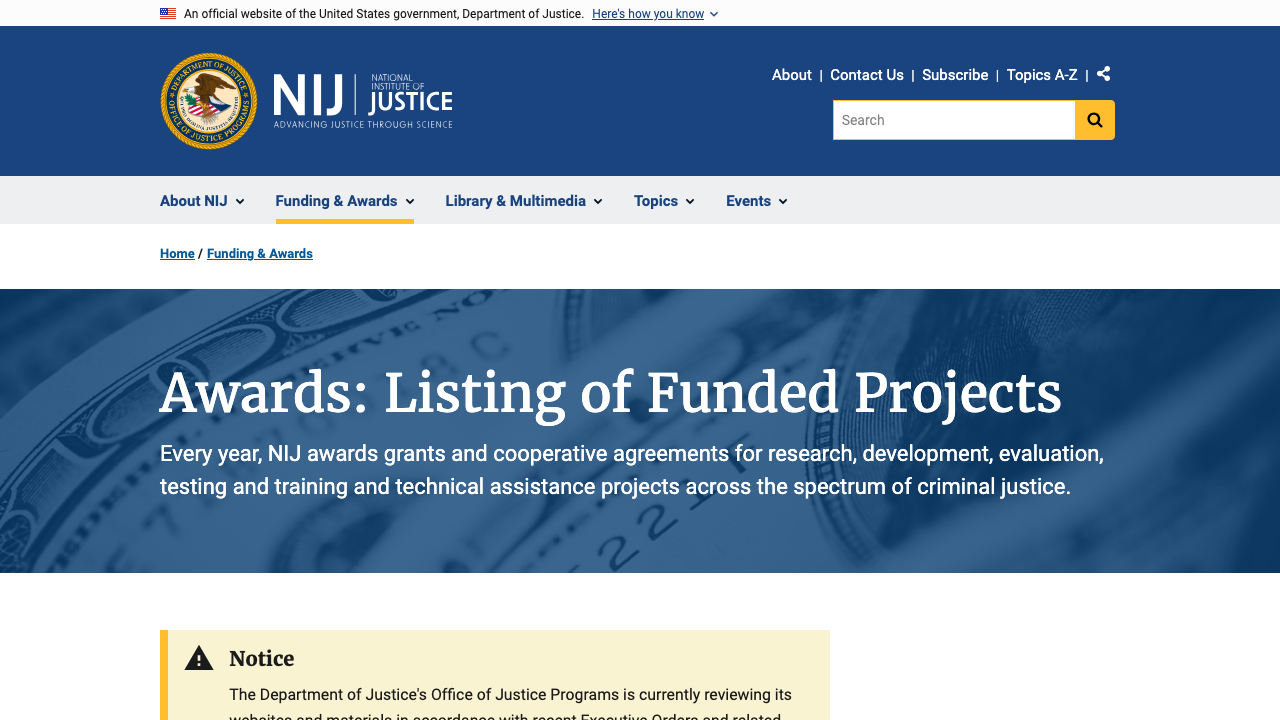

Scraping page 8...


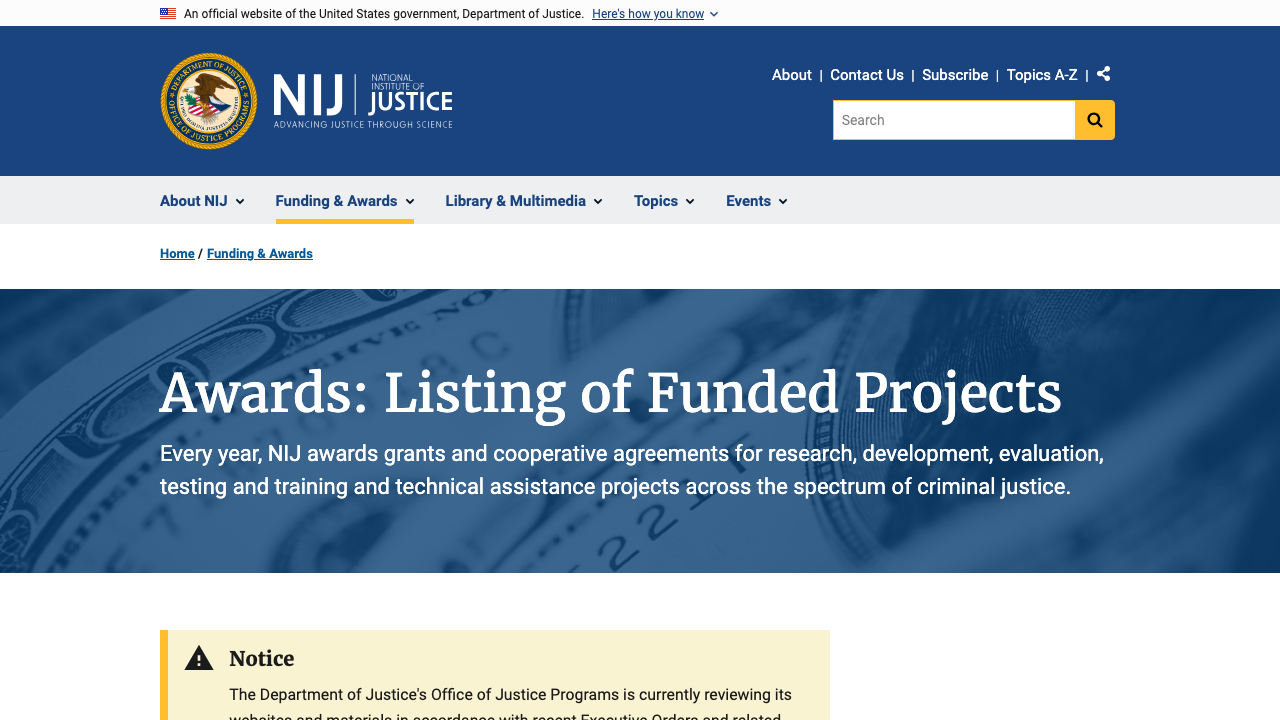

Scraping page 9...


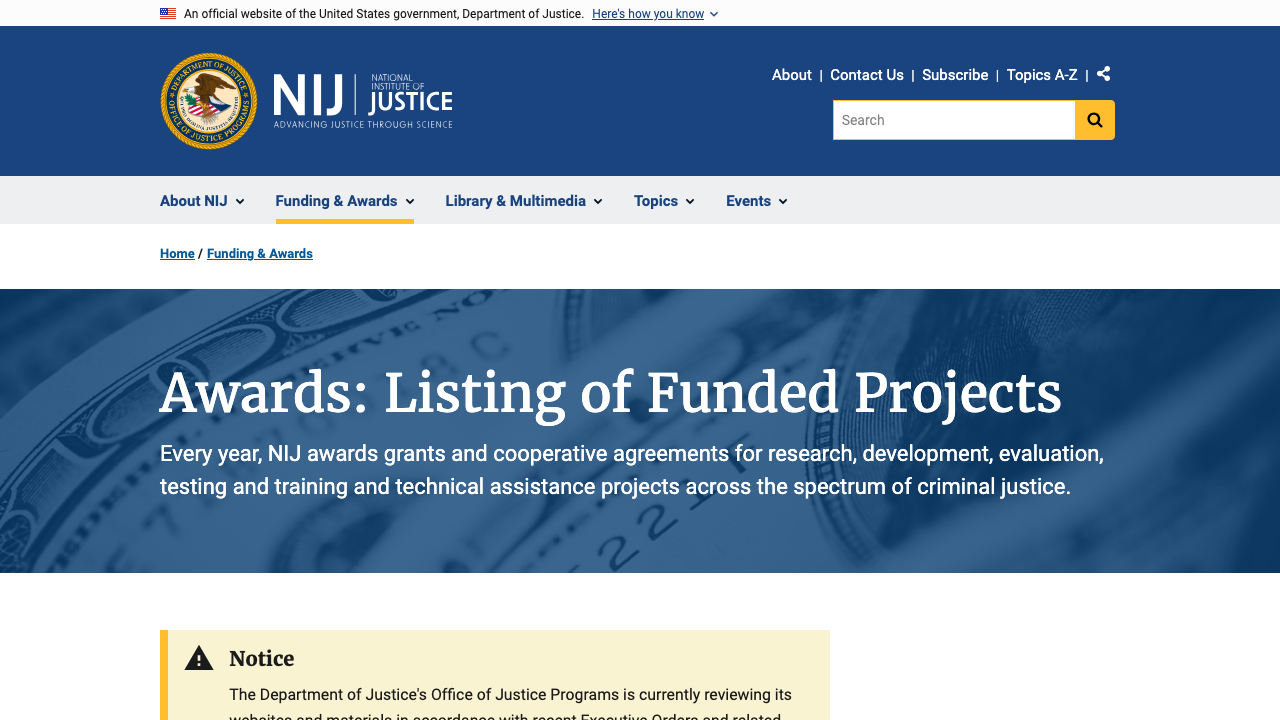

Scraping page 10...


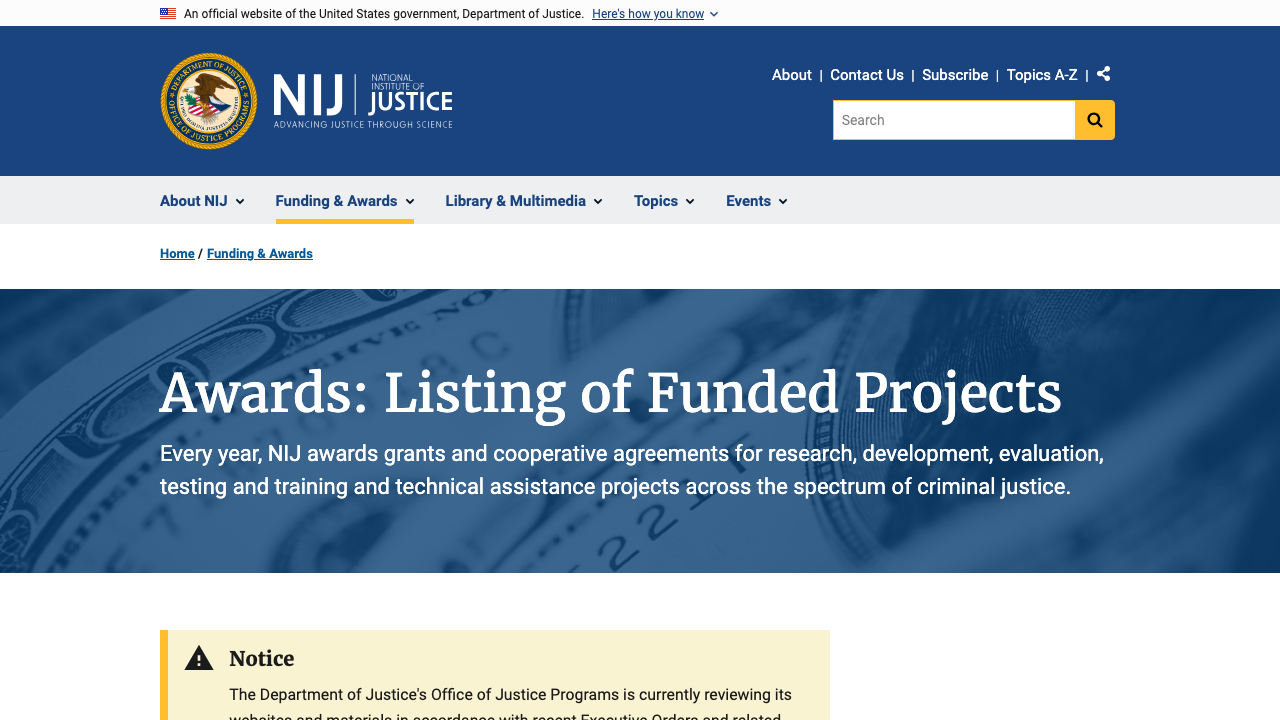

Scraped 250 awards from 10 pages.


In [7]:
# Cell 4: Scrape the first 10 pages
all_awards = []

for page_number in range(10):  # Pages 0 through 9
    print(f"Scraping page {page_number + 1}...")
    html = asyncio.get_event_loop().run_until_complete(fetch_page(url, page_number=page_number))
    soup = BeautifulSoup(html, "html.parser")
    
    rows = soup.find_all("tr")
    for row in rows:
        cells = row.find_all("td")
        if len(cells) == 8:
            award = {
                "Fiscal Year": cells[0].get_text(strip=True),
                "Title": cells[1].get_text(strip=True),
                "Funding Opportunity": cells[2].get_text(strip=True),
                "Awardee": cells[3].get_text(strip=True),
                "State": cells[4].get_text(strip=True),
                "Award Number": cells[5].get_text(strip=True),
                "Award Amount": cells[6].get_text(strip=True),
                "Award Status": cells[7].get_text(strip=True),
            }
            all_awards.append(award)

print(f"Scraped {len(all_awards)} awards from 10 pages.")


In [9]:
# Cell 5a: Save CSV to a writable folder (e.g., Desktop)
import os
import pandas as pd

# Adjust this path to your Desktop or any folder you can write to
desktop_path = os.path.expanduser("~/Desktop")
csv_filename = os.path.join(desktop_path, "nij_awards_first_10_pages.csv")

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(all_awards)

# Save to CSV
df.to_csv(csv_filename, index=False)

print(f"Saved {len(df)} awards to '{csv_filename}'")
df.head()  # Preview first 5 rows



Saved 250 awards to '/Users/kyliecliftonsmacbook/Desktop/nij_awards_first_10_pages.csv'


Fiscal Year                                              Title  \
0        2024  A Combined Molecular Analysis of Pollen Utiliz...   
1        2024  A Comparative Evaluation of the MinION and MiS...   
2        2024  A Comprehensive Evaluation and Error Rate Asse...   
3        2024  A Focused Deterrence Program for Juveniles wit...   
4        2024  A Multi-District Analysis of School Safety in ...   

                                 Funding Opportunity  \
0              NIJ FY24 Graduate Research Fellowship   
1  NIJ FY24 Research and Development in Forensic ...   
2  NIJ FY24 Research and Development in Forensic ...   
3  NIJ FY24 Research and Evaluation on Youth Just...   
4  NIJ FY24 Research and Evaluation on School Safety   

                                             Awardee State  \
0  THE UNIVERSITY OF CENTRAL FLORIDA BOARD OF TRU...    FL   
1                   FLORIDA INTERNATIONAL UNIVERSITY    FL   
2                        RESEARCH TRIANGLE INSTITUTE    NC   
3                           FLORIDA STATE UNIVERSITY    FL   
4                        RESEARCH TRIANGLE INSTITUTE    NC   

              Award Number Award Amount Award Status  
0  15PNIJ-24-GG-01571-RESS     $120,000         Open  
1  15PNIJ-24-GG-03842-SLFO     $487,790         Open  
2  15PNIJ-24-GG-03851-SLFO     $499,902         Open  
3  15PNIJ-24-GG-03092-MUMU   $1,255,241         Open  
4  15PNIJ-24-GK-01051-STOP     $933,524         Open